# Google Advanced Data Analytics Professional Certificate Project: TikTok Claims Classification Scenario

**Daniel Poe, 2025-06-27**

This is a course project that I have completed as part of the [Google Advanced Data Analytics Professional Certificate](https://www.coursera.org/professional-certificates/google-advanced-data-analytics). This certificate builds on data analytics skills and experience to take careers to the next level. It is designed for graduates of the [Google Data Analytics Certificate](https://www.coursera.org/professional-certificates/google-data-analytics) or people with equivalent data analytics experience. This course enables learners to expand their knowledge through practical, hands-on projects that feature Jupyter Notebook, Python, and Tableau. Course participants can learn the following:

- Explore the roles of data professionals within an organization 
- Create data visualizations and apply statistical methods to investigate data
- Build regression and machine learning models to analyze and interpret data
- Communicate insights from data analysis to stakeholders

This notebook will cover each of the end-of-course projects as a demonstration of skills gained throughout the certificate program.

I have completed this at an earlier date, but I have decided to compile everything into one notebook here for ease of reference.

## Background on the TikTok scenario
At TikTok, our mission is to inspire creativity and bring joy. Our employees lead with curiosity and move at the speed of culture. Combined with our company's flat structure, you'll be given dynamic opportunities to make a real impact on a rapidly expanding company and grow your career.

TikTok users have the ability to submit reports that identify videos and comments that contain user claims. These reports identify content that needs to be reviewed by moderators. The process generates a large number of user reports that are challenging to consider in a timely manner. 

TikTok is working on the development of a predictive model that can determine whether a video contains a claim or offers an opinion. With a successful prediction model, TikTok can reduce the backlog of user reports and prioritize them more efficiently.

### Team Members at TikTok
#### Data Team Roles

- Willow Jaffey - Data Science Lead
- Rosie Mae Bradshaw - Data Science Manager
- Orion Rainier - Data Scientist

The members of the data team at TikTok are well versed in data analysis and data science. Messages to these more technical coworkers should be concise and specific.

#### Cross-Functional Team Members

- Mary Joanna Rodgers - Project Management Officer
- Margery Adebowale - Finance Lead, Americas
- Maika Abadi - Operations Lead

Your TikTok team includes several managers, who oversee operations. It is important to adjust your general correspondence appropriately to their roles, given that their responsibilities are less technical in nature. 

***Note:*** The story, all names, characters, and incidents portrayed in this project are fictitious. No identification with actual persons (living or deceased) is intended or should be inferred. And, the data shared in this project has been created for pedagogical purposes. 

## Inspect and Analyse Data

At this point, I will import all relevant packages that I will use throughout this notebook.

At the time of writing and compilation, I have learnt to use the Polars package through the [DataCamp - Introduction to Polars](https://app.datacamp.com/learn/courses/introduction-to-polars) course. I will make use of the new skills I have learnt there in this project.

In [1]:
# Import relevant packages

# I learnt to use polars in the 'Introduction to Polars' course on DataCamp, and will use it here to demonstrate my ability using it.

# Import packages for data manipulation and analysis
import polars as pl
import pandas as pd
import numpy as np

# Import packages for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for statistical analysis/hypothesis testing
from scipy import stats
import statsmodels

# Import packages for preprocessing and machine learning
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.utils import resample

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

In [2]:
# Import the data
data=pl.read_csv('tiktok_dataset.csv', ignore_errors=True)
data.head()

#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
i64,str,i64,i64,str,str,str,i64,i64,i64,i64,i64
1,"""claim""",7017666017,59,"""someone shared with me that dr…","""not verified""","""under review""",343296,19425,241,1,0
2,"""claim""",4014381136,32,"""someone shared with me that th…","""not verified""","""active""",140877,77355,19034,1161,684
3,"""claim""",9859838091,31,"""someone shared with me that am…","""not verified""","""active""",902185,97690,2858,833,329
4,"""claim""",1866847991,25,"""someone shared with me that th…","""not verified""","""active""",437506,239954,34812,1234,584
5,"""claim""",7105231098,19,"""someone shared with me that th…","""not verified""","""active""",56167,34987,4110,547,152


In [3]:
# Get summary information about the dataset
data.schema

Schema([('#', Int64),
        ('claim_status', String),
        ('video_id', Int64),
        ('video_duration_sec', Int64),
        ('video_transcription_text', String),
        ('verified_status', String),
        ('author_ban_status', String),
        ('video_view_count', Int64),
        ('video_like_count', Int64),
        ('video_share_count', Int64),
        ('video_download_count', Int64),
        ('video_comment_count', Int64)])

In [4]:
# Get the shape of the data
data.shape

(19382, 12)

In [5]:
# Get summary statistics
data.describe()

statistic,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
str,f64,str,f64,f64,str,str,str,f64,f64,f64,f64,f64
"""count""",19382.0,"""19084""",19382.0,19382.0,"""19084""","""19382""","""19382""",19084.0,19084.0,19084.0,19084.0,19084.0
"""null_count""",0.0,"""298""",0.0,0.0,"""298""","""0""","""0""",298.0,298.0,298.0,298.0,298.0
"""mean""",9691.5,null,5.6275e9,32.421732,null,null,null,254708.558688,84304.63603,16735.248323,1049.429627,349.312146
"""std""",5595.245794,null,2.5364e9,16.229967,null,null,null,322893.280814,133420.546814,32036.17435,2004.299894,799.638865
"""min""",1.0,"""claim""",1.2350e9,5.0,"""a colleague claimed the media …","""not verified""","""active""",20.0,0.0,0.0,0.0,0.0
"""25%""",4846.0,null,3.4302e9,18.0,null,null,null,4943.0,811.0,115.0,7.0,1.0
"""50%""",9692.0,null,5.6192e9,32.0,null,null,null,9956.0,3404.0,717.0,46.0,9.0
"""75%""",14537.0,null,7.8443e9,47.0,null,null,null,504322.0,125019.0,18217.0,1156.0,292.0
"""max""",19382.0,"""opinion""",9.9999e9,60.0,"""the news told me someone revea…","""verified""","""under review""",999817.0,657830.0,256130.0,14994.0,9599.0


**Observations:**
- The dataframe contains a collection of categorical, text, and numerical data. Each row represents a distinct TikTok video that presents either a claim or an opinion and the accompanying metadata about that video.
- The dataframe contains eight int64s, and four strings. There are 19,382 observations, but some of the variables are missing values, including claim status, the video transcripton, and all of the count variables.
- Many of the count variables seem to have outliers at the high end of the distribution. They have very large standard deviations and maximum values that are very high compared to their quartile values.

In [6]:
# What are the different values for claim status and how many of each are in the data?
### YOUR CODE HERE ###
data['claim_status'].value_counts()

claim_status,count
str,u32
null,298
"""claim""",9608
"""opinion""",9476


**Question:** What do you notice about the values shown?

The counts of each claim status are quite balanced. There are also 298 null values in the `claim_status` column.

In [7]:
# What is the average view count of videos with "claim" status?
### YOUR CODE HERE ###

claims = data.filter(pl.col('claim_status') == 'claim')
print('Mean View Count Claims:', claims['video_view_count'].mean())
print('Median View Count Claims:', claims['video_view_count'].median())

Mean View Count Claims: 501029.4527477102
Median View Count Claims: 501555.0


In [8]:
# What is the average view count of videos with "opinion" status?
### YOUR CODE HERE ###

opinions = data.filter(pl.col('claim_status') == 'opinion')
print('Mean View Count Opinions:', opinions['video_view_count'].mean())
print('Median View Count Opinions:', opinions['video_view_count'].median())

Mean View Count Opinions: 4956.43224989447
Median View Count Opinions: 4953.0


**Question:** What do you notice about the mean and media within each claim category?

The mean and the median within each claim category are close to one another, but there is a vast discrepancy between view counts for videos labeled as claims and videos labeled as opinions.

In [9]:
# Get counts for each group combination of claim status and author ban status
### YOUR CODE HERE ###

data.group_by(['claim_status', 'author_ban_status']).len().sort('claim_status', 'author_ban_status')

claim_status,author_ban_status,len
str,str,u32
null,"""active""",280
null,"""banned""",4
null,"""under review""",14
"""claim""","""active""",6566
"""claim""","""banned""",1439
"""claim""","""under review""",1603
"""opinion""","""active""",8817
"""opinion""","""banned""",196
"""opinion""","""under review""",463


**Question:** What do you notice about the number of claims videos with banned authors? Why might this relationship occur?

There are many more claim videos with banned authors than there are opinion videos with banned authors. This could mean a number of things, including the possibilities that:
- Claim videos are more strictly policed than opinion videos
- Authors must comply with a stricter set of rules if they post a claim than if they post an opinion

It should be noted that there is no way of knowing if claim videos are inherently more likely than opinion videos to result in author bans, or if authors who post claim videos are more likely to post videos that violate terms of service.

Finally, while we can use this data to draw conclusions about banned/active authors, we cannot draw conclusions about banned videos. There is no way of determining whether a particular video caused the ban, and banned authors could have posted videos that complied with the terms of service.

In [10]:
# Group the data by author ban status and calculate mean and median view, like, and share counts
### YOUR CODE HERE ###
data.group_by('author_ban_status').agg([
    pl.col('video_view_count').mean().alias('view_count_mean'),
    pl.col('video_view_count').median().alias('view_count_median'),
    pl.col('video_like_count').mean().alias('like_count_mean'),
    pl.col('video_like_count').median().alias('like_count_median'),
    pl.col('video_share_count').mean().alias('share_count_mean'),
    pl.col('video_share_count').median().alias('share_count_median')
]).sort('view_count_mean')

author_ban_status,view_count_mean,view_count_median,like_count_mean,like_count_median,share_count_mean,share_count_median
str,f64,f64,f64,f64,f64,f64
"""active""",215927.039524,8616.0,71036.533836,2222.0,14111.466164,437.0
"""under review""",392204.836399,365245.5,128718.050339,71204.5,25774.696999,9444.0
"""banned""",445845.439144,448201.0,153017.236697,105573.0,29998.942508,14468.0


In [11]:
# What's the median video share count of each author ban status?
### YOUR CODE HERE ###
data.group_by('author_ban_status').agg(pl.col('video_share_count').median().alias('video_share_count_median')).sort('author_ban_status')

author_ban_status,video_share_count_median
str,f64
"""active""",437.0
"""banned""",14468.0
"""under review""",9444.0


**Question:** What do you notice about the share count of banned authors, compared to that of active authors? Explore this in more depth.

Banned authors have a median share count that is 33 times the median share count of active authors.

In [12]:
# Group the data by author ban status and calculate count, mean, and median for view, like, and share counts
data.group_by('author_ban_status').agg([
    pl.col('video_view_count').count().alias('view_count_count'),
    pl.col('video_view_count').mean().alias('view_count_mean'),
    pl.col('video_view_count').median().alias('view_count_median'),
    pl.col('video_like_count').count().alias('like_count_count'),
    pl.col('video_like_count').mean().alias('like_count_mean'),
    pl.col('video_like_count').median().alias('like_count_median'),
    pl.col('video_share_count').count().alias('share_count_count'),
    pl.col('video_share_count').mean().alias('share_count_mean'),
    pl.col('video_share_count').median().alias('share_count_median')
]).sort('author_ban_status')

author_ban_status,view_count_count,view_count_mean,view_count_median,like_count_count,like_count_mean,like_count_median,share_count_count,share_count_mean,share_count_median
str,u32,f64,f64,u32,f64,f64,u32,f64,f64
"""active""",15383,215927.039524,8616.0,15383,71036.533836,2222.0,15383,14111.466164,437.0
"""banned""",1635,445845.439144,448201.0,1635,153017.236697,105573.0,1635,29998.942508,14468.0
"""under review""",2066,392204.836399,365245.5,2066,128718.050339,71204.5,2066,25774.696999,9444.0


**Question:** What do you notice about the number of views, likes, and shares for banned authors compared to active authors?

There are a few observations that we can make:

- Banned authors and those under review get far more views, likes, and shares than active authors.
- In most groups, the mean is much greater than the median, which indicates that there are some videos with very high engagement counts.

Now, I will create three new columns to help better understand engagement rates:

- `likes_per_view`: represents the number of likes divided by the number of views for each video
- `comments_per_view`: represents the number of comments divided by the number of views for each video
- `shares_per_view`: represents the number of shares divided by the number of views for each video

In [13]:
# Create likes_per_view, comments_per_view, and shares_per_view columns using Polars' with_columns
data = data.with_columns([
	(pl.col('video_like_count') / pl.col('video_view_count')).alias('likes_per_view'),
	(pl.col('video_comment_count') / pl.col('video_view_count')).alias('comments_per_view'),
	(pl.col('video_share_count') / pl.col('video_view_count')).alias('shares_per_view')
])

In [14]:
# Group the data by claim status and author ban status, and calculate count, mean, and median for likes_per_view, comments_per_view, and shares_per_view
### YOUR CODE HERE ###
data.group_by(['claim_status', 'author_ban_status']).agg([
    pl.col('likes_per_view').count().alias('likes_per_view_count'),
    pl.col('likes_per_view').mean().alias('likes_per_view_mean'),
    pl.col('likes_per_view').median().alias('likes_per_view_median'),
    pl.col('comments_per_view').count().alias('comments_per_view_count'),
    pl.col('comments_per_view').mean().alias('comments_per_view_mean'),
    pl.col('comments_per_view').median().alias('comments_per_view_median'),
    pl.col('shares_per_view').count().alias('shares_per_view_count'),
    pl.col('shares_per_view').mean().alias('shares_per_view_mean'),
    pl.col('shares_per_view').median().alias('shares_per_view_median')
]).sort('claim_status', 'author_ban_status')

claim_status,author_ban_status,likes_per_view_count,likes_per_view_mean,likes_per_view_median,comments_per_view_count,comments_per_view_mean,comments_per_view_median,shares_per_view_count,shares_per_view_mean,shares_per_view_median
str,str,u32,f64,f64,u32,f64,f64,u32,f64,f64
null,"""active""",0,null,null,0,null,null,0,null,null
null,"""banned""",0,null,null,0,null,null,0,null,null
null,"""under review""",0,null,null,0,null,null,0,null,null
"""claim""","""active""",6566,0.329542,0.326538,6566,0.001393,0.000776,6566,0.065456,0.049279
"""claim""","""banned""",1439,0.345071,0.358909,1439,0.001377,0.000746,1439,0.067893,0.051606
"""claim""","""under review""",1603,0.327997,0.320867,1603,0.001367,0.000789,1603,0.065733,0.049967
"""opinion""","""active""",8817,0.219744,0.21833,8817,0.000517,0.000252,8817,0.043729,0.032405
"""opinion""","""banned""",196,0.206868,0.198483,196,0.000434,0.000193,196,0.040531,0.030728
"""opinion""","""under review""",463,0.226394,0.228051,463,0.000536,0.000293,463,0.044472,0.035027


**Question:** How does the data for claim videos and opinion videos compare or differ? Consider views, comments, likes, and shares.

We know that videos by banned authors and those under review tend to get far more views, likes, and shares than videos by non-banned authors. However, when a video does get viewed, its engagement rate is less related to author ban status and more related to its claim status.

We also know that claim videos have a higher view rate than opinion videos, but this tells us that claim videos also have a higher rate of likes on average, so they are more favorably received as well. They also receive more engagement via comments and shares than opinion videos.

For claim videos, banned authors have slightly higher likes/view and shares/view rates than active authors or those under review. However, for opinion videos, active authors and those under review both get higher engagement rates than banned authors in all categories.

### Summary

- Of the 19,382 samples in this dataset, just under 50% are claims—9,608 of them.
- Engagement level is strongly correlated with claim status. This should be a focus of further inquiry.
- Videos with banned authors have significantly higher engagement than videos with active authors. Videos with authors under review fall between these two categories in terms of engagement levels.

## Exploratory Data Analysis (EDA)

I will conduct exploratory data analysis on data for the claims classification project. I will also use Tableau to create visuals to help non-technical stakeholders engage and interact with the data.

The Tableau visualisations can be found [here](https://public.tableau.com/app/profile/daniel.poe/viz/GoogleAdvancedDataAnalyticsTikTokClaimsCourseProjectTableauVisualisationsDanielPoe/ClaimClassificationsDatasetEDA).

### Creating Visualisations

Now that I have assessed the data, it is time to plot my visualisation(s).

#### **`video_duration_sec`**

Create a box plot to examine the spread of values in the `video_duration_sec` column.

<Axes: title={'center': 'video_duration_sec'}, xlabel='video_duration_sec'>

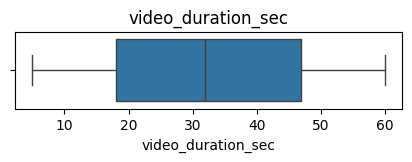

In [15]:
# Create a boxplot to visualise distribution of `video_duration_sec`
plt.figure(figsize=(5,1))
plt.title("video_duration_sec")
sns.boxplot(x=data["video_duration_sec"])

Create a histogram of the values in the `video_duration_sec` column to further explore the distribution of this variable.

Text(0.5, 1.0, 'Video Duration Histogram')

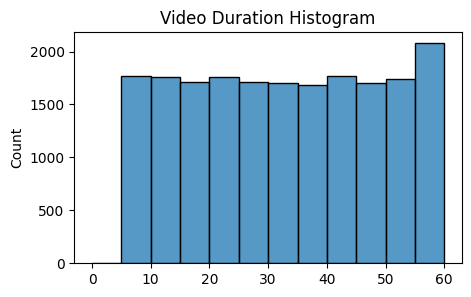

In [16]:
# Create a histogram
plt.figure(figsize=(5,3))
sns.histplot(data["video_duration_sec"],bins=range(0,61,5))
plt.title("Video Duration Histogram")

**Question:** What do you notice about the duration and distribution of the videos?

All videos are 5-60 seconds in length, and the distribution is uniform.

#### **`video_view_count`**
Create a box plot to examine the spread of values in the `video_view_count` column.

<Axes: title={'center': 'video_view_count'}, xlabel='video_view_count'>

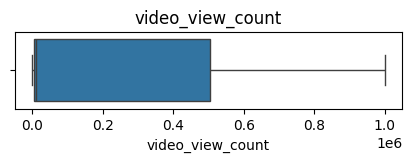

In [17]:
# Create a boxplot to visualise distribution of `video_view_count`
plt.figure(figsize=(5,1))
plt.title("video_view_count")
sns.boxplot(x=data["video_view_count"])

Create a histogram of the values in the `video_view_count` column to further explore the distribution of this variable.

Text(0.5, 1.0, 'Video View Count Histogram')

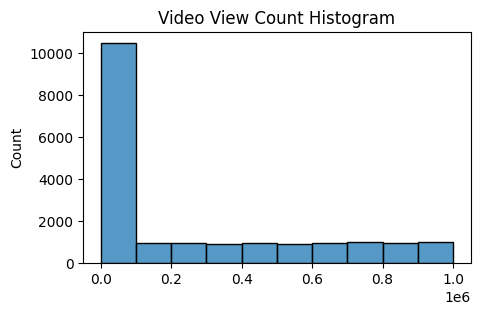

In [18]:
# Create a histogram
plt.figure(figsize=(5,3))
sns.histplot(data["video_view_count"],bins=range(0,(10**6+1),10**5))
plt.title("Video View Count Histogram")

**Question:** What do you notice about the distribution of this variable?

This variable distribution is very uneven, with more than half the videos receiving fewer than 100,000 views. Distribution of view counts more than 100,000 views is uniform.

#### **`video_like_count`**

Create a box plot to examine the spread of values in the `video_like_count` column.

<Axes: title={'center': 'video_like_count'}, xlabel='video_like_count'>

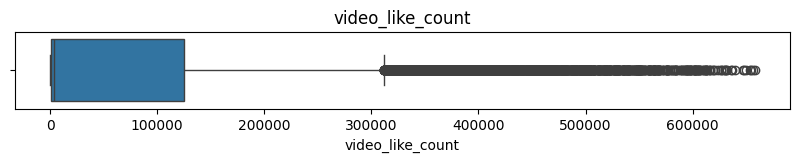

In [19]:
# Create a boxplot to visualise distribution of `video_like_count`
plt.figure(figsize=(10,1))
plt.title("video_like_count")
sns.boxplot(x=data["video_like_count"])

Create a histogram of the values in the `video_like_count` column to further explore the distribution of this variable.

Text(0.5, 1.0, 'Video Like Count Histogram')

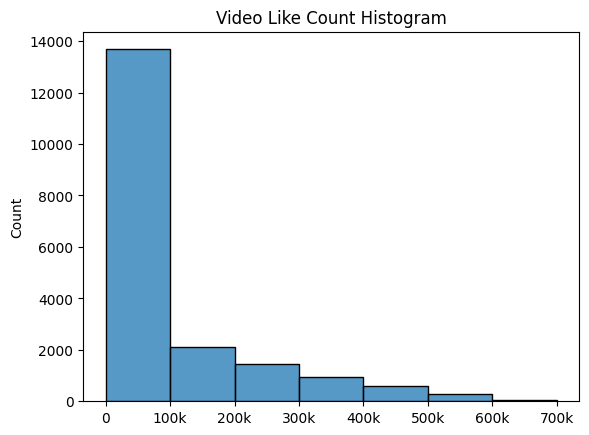

In [20]:
# Create a histogram
ax = sns.histplot(data['video_like_count'], bins=range(0, 7*10**5+1, 10**5))
labels = [0] + [str(i) + "k" for i in range(100, 701, 100)]
ax.set_xticks(range(0, 7*10**5+1, 10**5))
ax.set_xticklabels(labels)
plt.title('Video Like Count Histogram')

**Question:** What do you notice about the distribution of this variable?

Similar to view count, there are far more videos with less than 100,000 likes than there are videos with more. However, in this case, there is more of a taper, with the data skewing right, with many videos at the upper extremity of like count.

#### **`video_comment_count`**
Create a box plot to examine the spread of values in the `video_comment_count` column.

<Axes: title={'center': 'video_comment_count'}, xlabel='video_comment_count'>

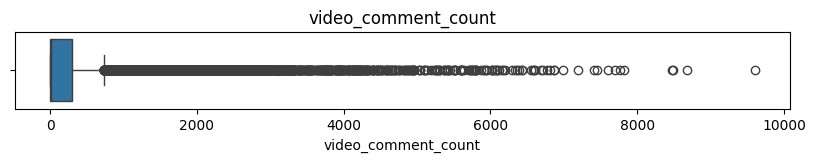

In [21]:
# Create a boxplot to visualise distribution of `video_comment_count`
plt.figure(figsize=(10,1))
plt.title('video_comment_count')
sns.boxplot(x=data['video_comment_count'])

Create a histogram of the values in the `video_comment_count` column to further explore the distribution of this variable.

Text(0.5, 1.0, 'Video Comment Count Histogram')

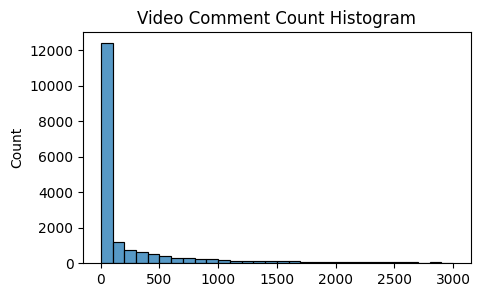

In [22]:
# Create a histogram
plt.figure(figsize=(5,3))
sns.histplot(data['video_comment_count'], bins=range(0,(3001),100))
plt.title('Video Comment Count Histogram')

**Question:** What do you notice about the distribution of this variable?

The vast majority of videos are grouped at the bottom of the range of values for video comment count. Most videos have fewer than 100 comments. The distribution is very right-skewed.

#### **`video_share_count`**
Create a box plot to examine the spread of values in the `video_share_count` column.

<Axes: title={'center': 'video_share_count'}, xlabel='video_share_count'>

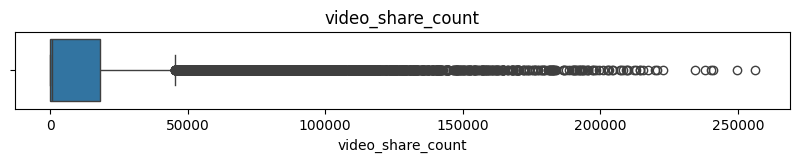

In [23]:
# Create a boxplot to visualise distribution of `video_share_count`
plt.figure(figsize=(10,1))
plt.title('video_share_count')
sns.boxplot(x=data['video_share_count'])

Create a histogram of the values in the `video_share_count` column to further explore the distribution of this variable.

Text(0.5, 1.0, 'Video Share Count Histogram')

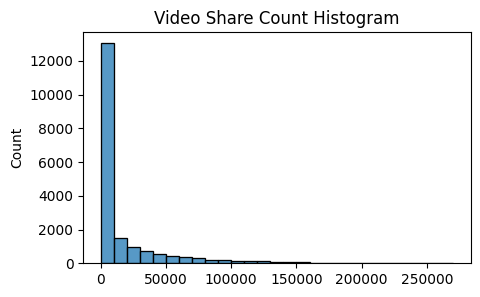

In [24]:
# Create a histogram
plt.figure(figsize=(5,3))
sns.histplot(data['video_share_count'], bins=range(0,(270001),10000))
plt.title('Video Share Count Histogram')

**Question:** What do you notice about the distribution of this variable?

The great majority of videos had fewer than 10,000 shares. The distribution is very skewed to the right.

#### **`video_download_count`**
Create a box plot to examine the spread of values in the `video_download_count` column.

<Axes: title={'center': 'video_download_count'}, xlabel='video_download_count'>

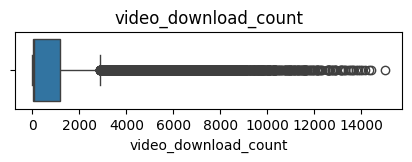

In [25]:
# Create a boxplot to visualise distribution of `video_download_count`

plt.figure(figsize=(5,1))
plt.title('video_download_count')
sns.boxplot(x=data['video_download_count'])

Create a histogram of the values in the `video_download_count` column to further explore the distribution of this variable.

Text(0.5, 1.0, 'Video Download Count Histogram')

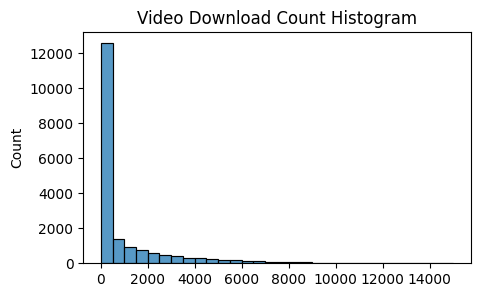

In [26]:
# Create a histogram
plt.figure(figsize=(5,3))
sns.histplot(data['video_download_count'], bins=range(0,(15001),500))
plt.title('Video Download Count Histogram')

**Question:** What do you notice about the distribution of this variable?

The majority of videos were downloaded fewer than 500 times, but some were downloaded over 12,000 times. Again, the data is very skewed to the right.

#### Claim Status by Verification Status
Now, create a bar chart with four bars: one for each combination of claim status and verification status.

Text(0.5, 1.0, 'Claims by Verification Status Bar Chart')

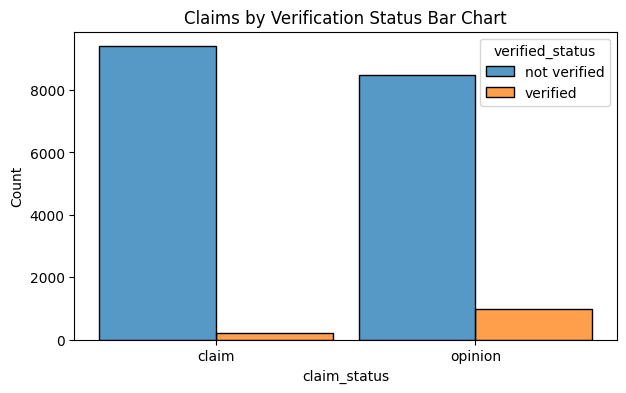

In [27]:
# Create a bar chart to visualise the distribution of `claim_status`
plt.figure(figsize=(7,4))
sns.histplot(
    data=data.to_pandas(),
    x='claim_status',
    hue='verified_status',
    multiple='dodge',
    shrink=0.9
)
plt.title('Claims by Verification Status Bar Chart')

**Question:** What do you notice about the number of verified users compared to unverified? And how does that affect their likelihood to post opinions?

There are far fewer verified users than unverified users, but if a user is verified, they are much more likely to post opinions.

#### Claim Status by Author Ban Status

The previous course used a `groupby()` (polars `group_by()`) statement to examine the count of each claim status for each author ban status. Now, use a bar chart to communicate the same information.

Text(0.5, 1.0, 'Claim Status by Author Ban Status - Counts')

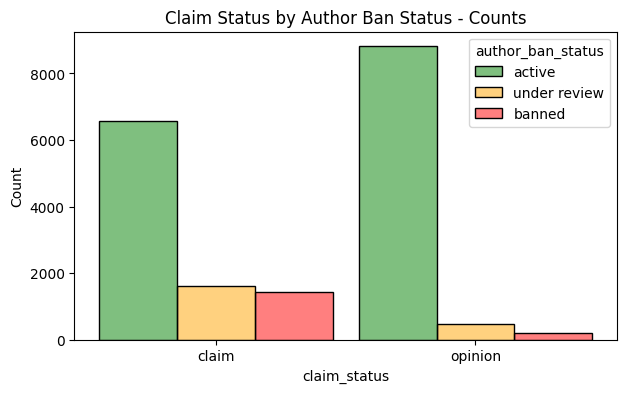

In [28]:
# Create a bar chart to visualise the distribution of `claim_status` by `author_ban_status`
fig = plt.figure(figsize=(7,4))
sns.histplot(data, x='claim_status', hue='author_ban_status',
             multiple='dodge',
             hue_order=['active', 'under review', 'banned'],
             shrink=0.9,
             palette={'active':'green', 'under review':'orange', 'banned':'red'},
             alpha=0.5)
plt.title('Claim Status by Author Ban Status - Counts')

**Question:** What do you notice about the number of active authors compared to banned authors for both claims and opinions?

For both claims and opinions, there are many more active authors than banned authors or authors under review. However, the proportion of active authors is far greater for opinion videos than for claim videos. It seems that authors who post claim videos are more likely to come under review and/or get banned.

#### Median View Counts by Ban Status
Create a bar plot with three bars: one for each author ban status. The height of each bar should correspond with the median number of views for all videos with that author ban status.

Text(0.5, 1.0, 'Median View Count by Ban Status')

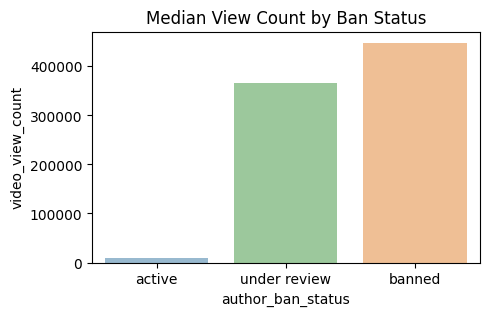

In [29]:
# Create a bar plot to visualise the median view count by author ban status
ban_status_counts = data.group_by('author_ban_status').agg(
    pl.col('video_view_count').median().alias('video_view_count')
).sort('author_ban_status').to_pandas()

fig = plt.figure(figsize=(5,3))
sns.barplot(data=ban_status_counts,
            x='author_ban_status',
            y='video_view_count',
            order=['active', 'under review', 'banned'],
            hue='author_ban_status',
            alpha=0.5)
plt.title('Median View Count by Ban Status')

**Question:** What do you notice about the median view counts for non-active authors compared to that of active authors? Based on that insight, what variable might be a good indicator of claim status?

The median view counts for non-active authors are a lot greater than the median view count for active authors. Since we know that non-active authors are more likely to post claims, and that videos by non-active authors get far more views on aggregate than videos by active authors, then video_view_count might be a good indicator of claim status.

In [30]:
# Calculate the median view count for claim status.
data.group_by('claim_status').agg(pl.col('video_view_count').median().alias('video_view_count_median')).sort('claim_status')

claim_status,video_view_count_median
str,f64
null,null
"""claim""",501555.0
"""opinion""",4953.0


#### Total Views by Claim Status
Create a pie graph that depicts the proportions of total views for claim videos and total views for opinion videos.

Text(0.5, 1.0, 'Total Views by Video Claim Status')

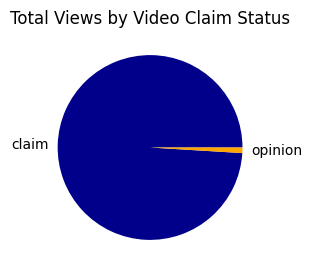

In [31]:
# Create a pie graph to visualise the total views by claim status
view_counts = data.group_by('claim_status').agg(
	pl.col('video_view_count').sum().alias('total_views')
).sort('claim_status').to_pandas()

fig = plt.figure(figsize=(3,3))
plt.pie(view_counts['total_views'], labels=view_counts['claim_status'], colors=['orange', 'darkblue'])
plt.title('Total Views by Video Claim Status')

**Question:** What do you notice about the overall view count for claim status?

The overall view count is dominated by claim videos, even though there are roughly the same number of each video in the dataset.

### Determine Outliers

When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis performed indicates that a video's engagement level is strongly correlated with its claim status. There is no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.

Nonetheless, it is good practice to get a sense of just how many of your data points could be considered outliers. The definition of an outlier can change based on the details of your project, and it helps to have domain expertise to decide a threshold. A common way to determine outliers in a normal distribution is to calculate the interquartile range (IQR) and set a threshold that is 1.5 * IQR above the 3rd quartile.

In this TikTok dataset, the values for the count variables are not normally distributed. They are heavily skewed to the right. One way of modifying the outlier threshold is by calculating the median value for each variable and then adding 1.5 * IQR. This results in a threshold that is, in this case, much lower than it would be if you used the 3rd quartile.

Write a for loop that iterates over the column names of each count variable. For each iteration:
1. Calculate the IQR of the column
2. Calculate the median of the column
3. Calculate the outlier threshold (median + 1.5 * IQR)
4. Calculate the numer of videos with a count in that column that exceeds the outlier threshold
5. Print "Number of outliers, {column name}: {outlier count}"

```
Example:
Number of outliers, video_view_count: ___
Number of outliers, video_like_count: ___
Number of outliers, video_share_count: ___
Number of outliers, video_download_count: ___
Number of outliers, video_comment_count: ___
```

In [32]:
# Determine how many data points in the data set could be considered outliers

count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count'
              ]

for column in count_cols:
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    median = data[column].median()
    outlier_threshold = median + 1.5*iqr 
    outlier_count = (data[column] > outlier_threshold).sum()
    print(f'Number of Outliers for {column}:', outlier_count)

Number of Outliers for video_view_count: 2343
Number of Outliers for video_like_count: 3468
Number of Outliers for video_share_count: 3732
Number of Outliers for video_download_count: 3733
Number of Outliers for video_comment_count: 3882


#### Scatterplots

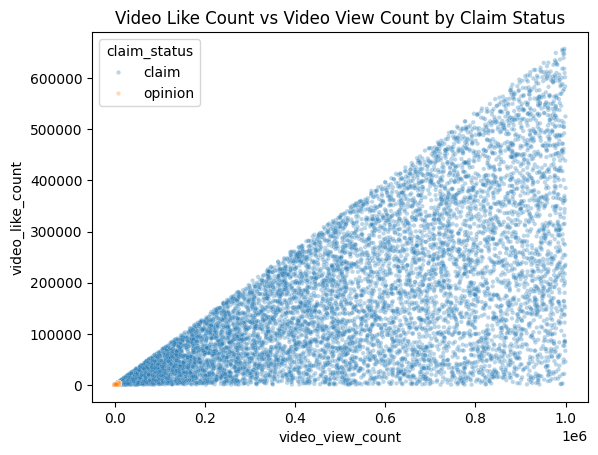

In [33]:
# Create a scatterplot of `video_view_count` versus `video_like_count` according to 'claim_status'
sns.scatterplot(x=data["video_view_count"], y=data["video_like_count"],
                hue=data["claim_status"], s=10, alpha=.3)
plt.title('Video Like Count vs Video View Count by Claim Status')
plt.show()

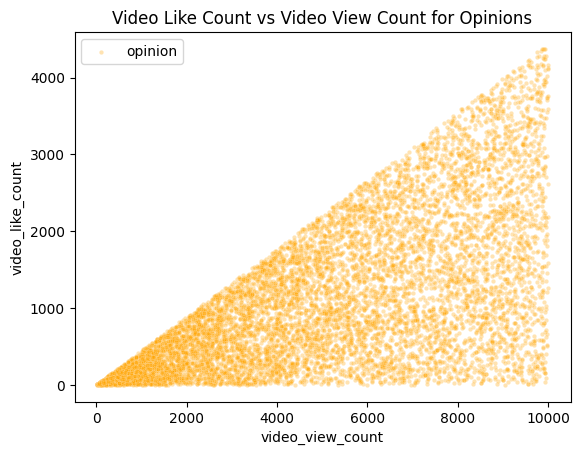

In [34]:
# Create a scatterplot of `video_view_count` versus `video_like_count` for opinions only
opinion = data.filter(pl.col('claim_status') == 'opinion').to_pandas()
sns.scatterplot(x=opinion["video_view_count"], y=opinion["video_like_count"],
                 s=10, alpha=.3, color='orange')
plt.legend(['opinion'])
plt.title('Video Like Count vs Video View Count for Opinions')
plt.show()

### Summary

I would like to further investigate distinctive characteristics that apply only to claims or only to opinions. Also, I want to consider other variables that might be helpful in understanding the data. My client would want to know the assumptions regarding what data might be predictive of `claim_status`.

EDA is important as it helps a data professional to get to know the data, understand its outliers, clean its missing values, and prepare it for future modeling. Visualisations helped me understand that we will need to make decisions on certain considerations prior to designing a model (e.g., what to do with outliers, duplicate values, or missing data).

## Data Exploration and Hypothesis Testing

I will conduct here hypothesis testing on the data for the claims classification data. I have been asked to investigate TikTok's user claim dataset to determine which hypothesis testing method best serves the data and the claims classification project.

### Data Cleaning and Data Exploration

Descriptive statistics are helpful because they allow us to quickly explore and understand large amounts of data. For this instance, computing descriptive statistics helps to quickly compute the mean values of `video_view_count` for each group of `verified_status` in the sample data.

In [35]:
# Generate a table of descriptive statistics about the data
### YOUR CODE HERE ###
data.describe()

statistic,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view
str,f64,str,f64,f64,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",19382.0,"""19084""",19382.0,19382.0,"""19084""","""19382""","""19382""",19084.0,19084.0,19084.0,19084.0,19084.0,19084.0,19084.0,19084.0
"""null_count""",0.0,"""298""",0.0,0.0,"""298""","""0""","""0""",298.0,298.0,298.0,298.0,298.0,298.0,298.0,298.0
"""mean""",9691.5,null,5.6275e9,32.421732,null,null,null,254708.558688,84304.63603,16735.248323,1049.429627,349.312146,0.276093,0.000954,0.05486
"""std""",5595.245794,null,2.5364e9,16.229967,null,null,null,322893.280814,133420.546814,32036.17435,2004.299894,799.638865,0.173006,0.001326,0.050597
"""min""",1.0,"""claim""",1.2350e9,5.0,"""a colleague claimed the media …","""not verified""","""active""",20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",4846.0,null,3.4302e9,18.0,null,null,null,4943.0,811.0,115.0,7.0,1.0,0.130243,0.000098,0.014446
"""50%""",9692.0,null,5.6192e9,32.0,null,null,null,9956.0,3404.0,717.0,46.0,9.0,0.264058,0.000455,0.039741
"""75%""",14537.0,null,7.8443e9,47.0,null,null,null,504322.0,125019.0,18217.0,1156.0,292.0,0.398481,0.001268,0.081861
"""max""",19382.0,"""opinion""",9.9999e9,60.0,"""the news told me someone revea…","""verified""","""under review""",999817.0,657830.0,256130.0,14994.0,9599.0,0.666648,0.01028,0.265956


In [36]:
# Check for missing values
### YOUR CODE HERE ###
data.null_count()

#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,298,0,0,298,0,0,298,298,298,298,298,298,298,298


In [37]:
# Drop rows with missing values

### YOUR CODE HERE ###
data = data.drop_nulls()

In [38]:
# Display first few rows after handling missing values

### YOUR CODE HERE ###
data.head()

#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view
i64,str,i64,i64,str,str,str,i64,i64,i64,i64,i64,f64,f64,f64
1,"""claim""",7017666017,59,"""someone shared with me that dr…","""not verified""","""under review""",343296,19425,241,1,0,0.056584,0.0,0.000702
2,"""claim""",4014381136,32,"""someone shared with me that th…","""not verified""","""active""",140877,77355,19034,1161,684,0.549096,0.004855,0.135111
3,"""claim""",9859838091,31,"""someone shared with me that am…","""not verified""","""active""",902185,97690,2858,833,329,0.108282,0.000365,0.003168
4,"""claim""",1866847991,25,"""someone shared with me that th…","""not verified""","""active""",437506,239954,34812,1234,584,0.548459,0.001335,0.079569
5,"""claim""",7105231098,19,"""someone shared with me that th…","""not verified""","""active""",56167,34987,4110,547,152,0.62291,0.002706,0.073175


I am interested at this point in the relationship between `verified_status` and `video_view_count`. One approach is to examine the mean value of `video_view_count` for each group of `verified_status` in the sample data.

In [39]:
# Compute the mean `video_view_count` for each group in `verified_status`
data.group_by("verified_status").agg(
	pl.col("video_view_count").mean().alias("mean_video_view_count")
).sort("verified_status")

verified_status,mean_video_view_count
str,f64
"""not verified""",265663.785339
"""verified""",91439.164167


### Hypothesis Testing

For this project, my null and alternative hypotheses are as follows:

- **Null hypothesis:** There is no difference in the number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (i.e. any observed difference in the sample data is due to chance or sampling variability).
- **Alternative hypothesis:** There is a difference in the number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (i.e. any observed difference in the sample data is due to an actual difference in the corresponding population means).

My goal in this step is to conduct a two-sample t-test. The steps for conducting a hypothesis test are as follows:

1. State the null hypothesis and the alternative hypothesis
2. Choose a signficance level
3. Find the p-value
4. Reject or fail to reject the null hypothesis

**$H_0$**: There is no difference in the number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (i.e. any observed difference in the sample data is due to chance or sampling variability).

**$H_A$**: There is a difference in the number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (i.e. any observed difference in the sample data is due to an actual difference in the corresponding population means).

I choose 5% as the significance level and now proceed with a two-sample t-test.


In [40]:
# Conduct a two-sample t-test to compare means
not_verified = data.filter(pl.col("verified_status") == "not verified")["video_view_count"].to_numpy()
verified = data.filter(pl.col("verified_status") == "verified")["video_view_count"].to_numpy()

stats.ttest_ind(a=not_verified, b=verified, equal_var=False)

TtestResult(statistic=np.float64(25.499441780633777), pvalue=np.float64(2.6088823687177823e-120), df=np.float64(1571.163074387424))

**Question:** Based on the p-value you got above, do you reject or fail to reject the null hypothesis?

Since the p-value is less than the significance value of 0.05, I fail to reject the null hypothesis. This means that there is a statistically significant difference in the mean video view counts between verified and unverified accounts on TikTok.

### Summary

Some business insights that can be drawn  from the result of the hypothesis test are as follows:

1. The analysis shows that there is a statistically significant difference in the average view counts between videos from verified accounts and videos from unverified accounts on TikTok, suggesting that there may be fundamental behavioral differences between these two groups of accounts.

2. It would be interesting to investigate the root cause of this behavioral difference. For example, do unverified accounts tend to post more clickbait videos? Or are unverified accounts associated with spam bots that help inflate view counts?

3. The next step would be to build a regression model on `verified_status`. A regression model is the natural next step because the end goal is to make predictions on the claim status. A regression model for `verified_status` can help to analyse user behavior in this group of verified users.

## Regression Modelling

I will create a regression model for the claims classification data. I will determine the type of regression model that is needed and develop one using TikTok's claim classification data.

Based on the hypothesis testing performed in the previous section, the objective for this section is to build a logistic regression model to predict user verified status and explore how video characteristics relate to verified users.

A logistic regression model relies on the following assumptions:

- The outcome variable is categorical.
- Observations are independent of each other.
- There is no severe multicollinearity among predictor variables.
- There are no extreme outliers.
- A linear relationship between each X variable and the logit of the outcome variable.
- There is a sufficiently large sample size.

### Explore Data with EDA

In [ ]:
# Recall dataset
data.head()

#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view
i64,str,i64,i64,str,str,str,i64,i64,i64,i64,i64,f64,f64,f64
1,"""claim""",7017666017,59,"""someone shared with me that dr…","""not verified""","""under review""",343296,19425,241,1,0,0.056584,0.0,0.000702
2,"""claim""",4014381136,32,"""someone shared with me that th…","""not verified""","""active""",140877,77355,19034,1161,684,0.549096,0.004855,0.135111
3,"""claim""",9859838091,31,"""someone shared with me that am…","""not verified""","""active""",902185,97690,2858,833,329,0.108282,0.000365,0.003168
4,"""claim""",1866847991,25,"""someone shared with me that th…","""not verified""","""active""",437506,239954,34812,1234,584,0.548459,0.001335,0.079569
5,"""claim""",7105231098,19,"""someone shared with me that th…","""not verified""","""active""",56167,34987,4110,547,152,0.62291,0.002706,0.073175


Based on the previous boxplots in **Exploratory Data Analysis (EDA)** section, the following columns contain outliers:

- `video_like_count`
- `video_comment_count`
- `video_share_count`
- `video_download_count`

However, for this notebook, outliers will only be removed based on the video_like_count and video_comment_count columns using the interquartile ranges.

In [42]:
# Check for and handle outliers for video_like_count
### YOUR CODE HERE ###
percentile25 = data["video_like_count"].quantile(0.25)
percentile75 = data["video_like_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

data = data.with_columns(
	pl.when(pl.col("video_like_count") > upper_limit)
	  .then(upper_limit)
	  .otherwise(pl.col("video_like_count"))
	  .alias("video_like_count")
)

In [43]:
# Check for and handle outliers for video_comment_count
### YOUR CODE HERE ###
percentile25 = data["video_comment_count"].quantile(0.25)
percentile75 = data["video_comment_count"].quantile(0.75)

iqr = percentile75 - percentile25
upper_limit = percentile75 + 1.5 * iqr

data = data.with_columns(
	pl.when(pl.col("video_comment_count") > upper_limit)
	  .then(upper_limit)
	  .otherwise(pl.col("video_comment_count"))
	  .alias("video_comment_count")
)

In [44]:
# Check class balance
### YOUR CODE HERE ###
data["verified_status"].value_counts(normalize=True)

verified_status,proportion
str,f64
"""not verified""",0.93712
"""verified""",0.06288


Approximately 93.7% of the dataset represents videos posted by unverified accounts and 6.3% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable, if needed.

In [45]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
### YOUR CODE HERE ###
data_majority = data.filter(pl.col("verified_status") == "not verified").to_pandas()
data_minority = data.filter(pl.col("verified_status") == "verified").to_pandas()

# Upsample the minority class (which is "verified")
### YOUR CODE HERE ###
data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # sampling with replacement
                                 n_samples=len(data_majority), # match majority class
                                 random_state=0)               # create reproducible results

# Combine majority class with upsampled minority class
### YOUR CODE HERE ###
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Display new class counts
### YOUR CODE HERE ###
data_upsampled["verified_status"].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

Get the average `video_transcription_text` length for videos posted by verified accounts and the average `video_transcription_text` length for videos posted by unverified accounts.

In [46]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions
### YOUR CODE HERE ###
data_upsampled[["verified_status", "video_transcription_text"]].groupby(by="verified_status")[["video_transcription_text"]].agg(func=lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [47]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###
data_upsampled["text_length"] = data_upsampled["video_transcription_text"].apply(func=lambda text: len(text))

In [48]:
# Display first few rows of dataframe after adding new column
### YOUR CODE HERE ###
data_upsampled.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296,19425.0,241,1,0.0,0.056584,0.000000,0.000702,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877,77355.0,19034,1161,684.0,0.549096,0.004855,0.135111,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185,97690.0,2858,833,329.0,0.108282,0.000365,0.003168,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506,239954.0,34812,1234,584.0,0.548459,0.001335,0.079569,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167,34987.0,4110,547,152.0,0.622910,0.002706,0.073175,128


Visualise the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts.

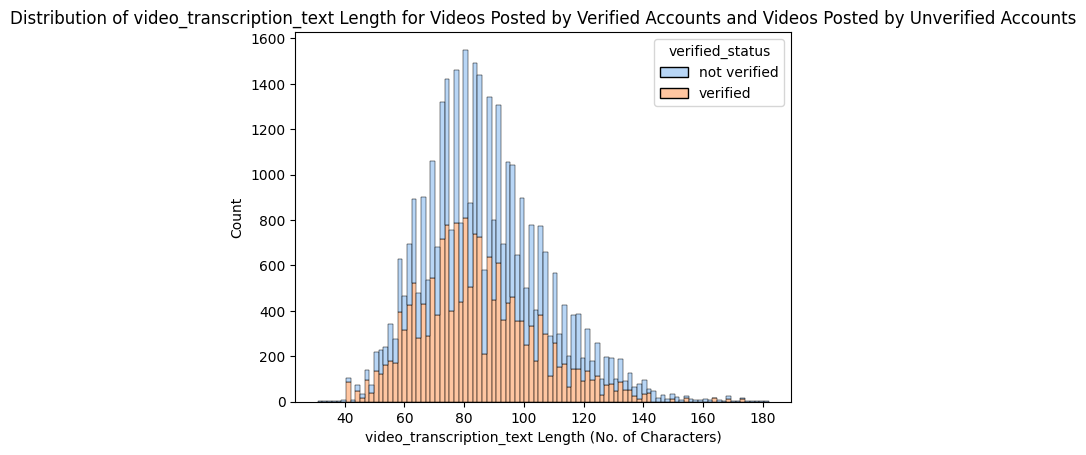

In [49]:
# Visualise the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
### YOUR CODE HERE ###
sns.histplot(data=data_upsampled, stat="count", multiple="stack", x="text_length", kde=False, palette="pastel", 
             hue="verified_status", element="bars", legend=True)
plt.xlabel("video_transcription_text Length (No. of Characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text Length for Videos Posted by Verified Accounts and Videos Posted by Unverified Accounts")
plt.show()

### Examine Correlations

Next, code a correlation matrix to help determine most correlated variables.

In [50]:
# Code a correlation matrix to help determine most correlated variables
### YOUR CODE HERE ###
data_upsampled.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,text_length
#,1.000000,-0.000853,-0.011729,-0.697007,-0.626386,-0.504015,-0.487096,-0.608773,-0.282755,-0.311144,-0.214349,-0.193677
video_id,-0.000853,1.000000,0.011859,0.002554,0.005993,0.010515,0.008753,0.012674,-0.005539,0.005954,-0.001698,-0.007083
video_duration_sec,-0.011729,0.011859,1.000000,0.013589,0.004494,0.002206,0.003989,-0.001086,-0.003731,-0.021063,0.001244,-0.002981
video_view_count,-0.697007,0.002554,0.013589,1.000000,0.856937,0.711313,0.690048,0.748361,0.278638,0.292290,0.204884,0.244693
video_like_count,-0.626386,0.005993,0.004494,0.856937,1.000000,0.832146,0.805542,0.818033,0.565200,0.442375,0.404021,0.216693
video_share_count,-0.504015,0.010515,0.002206,0.711313,0.832146,1.000000,0.710117,0.671335,0.485643,0.389892,0.594859,0.171651
video_download_count,-0.487096,0.008753,0.003989,0.690048,0.805542,0.710117,1.000000,0.793668,0.476817,0.600509,0.343180,0.173396
video_comment_count,-0.608773,0.012674,-0.001086,0.748361,0.818033,0.671335,0.793668,1.000000,0.455890,0.634753,0.332204,0.217661
likes_per_view,-0.282755,-0.005539,-0.003731,0.278638,0.565200,0.485643,0.476817,0.455890,1.000000,0.539845,0.675187,0.094428
comments_per_view,-0.311144,0.005954,-0.021063,0.292290,0.442375,0.389892,0.600509,0.634753,0.539845,1.000000,0.394044,0.114497


Visualise a correlation heatmap of the data.

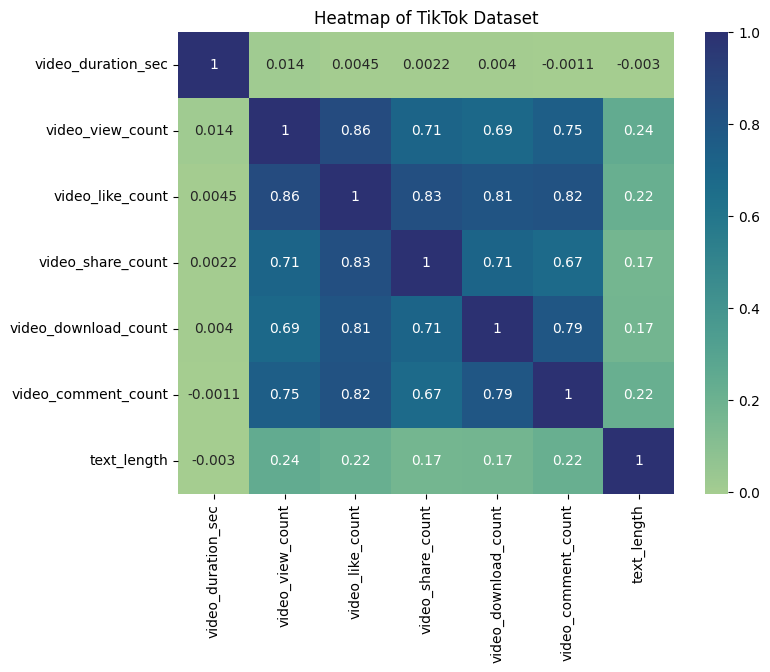

In [51]:
# Create a heatmap to visualise how correlated variables are
### YOUR CODE HERE ###
plt.figure(figsize=(8, 6))
sns.heatmap(
    data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", 
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]]
    .corr(numeric_only=True), 
    annot=True, 
    cmap="crest")
plt.title("Heatmap of TikTok Dataset")
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

**Question:** What variables are shown to be correlated in the heatmap?

The heatmap shows that video_view_count and video_like_count are strongly correlated with a correlation coefficient of 0.86. One of the logistic regression model assumptions is no severe multicollinearity among features. To build one that meets this assumption, we can exclude video_like_count. Among the variables that quantify video metrics, we can retain video_view_count, video_share_count, video_download_count, and video_comment_count as features.

### Select Variables

Now set the Y and X variables, outcome variable, and features.

In [52]:
# Select outcome variable
### YOUR CODE HERE ###
y = data_upsampled["verified_status"]

In [53]:
# Select features
### YOUR CODE HERE ###
X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]

# Display first few rows of features dataframe
### YOUR CODE HERE ###
X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296,241,1,0.0
1,32,claim,active,140877,19034,1161,684.0
2,31,claim,active,902185,2858,833,329.0
3,25,claim,active,437506,34812,1234,584.0
4,19,claim,active,56167,4110,547,152.0


### Train-Test Split

Split the data into training and testing sets.

In [54]:
# Split the data into training and testing sets
### YOUR CODE HERE ###
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

Confirm that the dimensions of the training and testing sets are in alignment.

In [55]:
# Get shape of each training and testing set
### YOUR CODE HERE ###
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((26826, 7), (8942, 7), (26826,), (8942,))

### Encode Variables

Check the data types of the features.

In [56]:
# Check data types
### YOUR CODE HERE ###
X_train.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count          int64
video_share_count         int64
video_download_count      int64
video_comment_count     float64
dtype: object

In [57]:
# Get unique values in `claim_status`
### YOUR CODE HERE ###
X_train["claim_status"].unique()

array(['opinion', 'claim'], dtype=object)

In [58]:
# Get unique values in `author_ban_status`
### YOUR CODE HERE ###
X_train["author_ban_status"].unique()

array(['active', 'under review', 'banned'], dtype=object)

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [59]:
# Select the training features that needs to be encoded
### YOUR CODE HERE ###
X_train_to_encode = X_train[["claim_status", "author_ban_status"]]

# Display first few rows
### YOUR CODE HERE ###
X_train_to_encode.head()

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active


In [60]:
# Set up an encoder for one-hot encoding the categorical features
### YOUR CODE HERE ###
X_encoder = OneHotEncoder(drop="first",sparse_output=False)

In [61]:
# Fit and transform the training features using the encoder
### YOUR CODE HERE ###
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [62]:
# Get feature names from encoder
### YOUR CODE HERE ###
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [63]:
# Display first few rows of encoded training features
### YOUR CODE HERE ###
X_train_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]], shape=(26826, 3))

In [64]:
# Place encoded training features (which is currently an array) into a dataframe
### YOUR CODE HERE ###
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
### YOUR CODE HERE ###
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [65]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
### YOUR CODE HERE ###
X_train.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
33058,33,2252,23,4,0.0
20491,52,6664,550,53,2.0
25583,37,6327,257,3,0.0
18474,57,1702,28,0,0.0
27312,21,3842,101,1,0.0


In [66]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
### YOUR CODE HERE ###
X_train_final=pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True),X_train_encoded_df],axis=1)

# Display first few rows
### YOUR CODE HERE ###
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,33,2252,23,4,0.0,1.0,0.0,0.0
1,52,6664,550,53,2.0,1.0,0.0,0.0
2,37,6327,257,3,0.0,1.0,0.0,0.0
3,57,1702,28,0,0.0,1.0,0.0,0.0
4,21,3842,101,1,0.0,1.0,0.0,0.0


Check the data type of the outcome variable.

In [67]:
# Check data type of outcome variable
### YOUR CODE HERE ###
X_train_final.dtypes

video_duration_sec                  int64
video_view_count                    int64
video_share_count                   int64
video_download_count                int64
video_comment_count               float64
claim_status_opinion              float64
author_ban_status_banned          float64
author_ban_status_under review    float64
dtype: object

In [68]:
# Get unique values of outcome variable
### YOUR CODE HERE ###
y_train.unique()

array(['verified', 'not verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Encode categorical values of the outcome variable the training set using an appropriate method.

In [69]:
# Set up an encoder for one-hot encoding the categorical outcome variable
### YOUR CODE HERE ###
y_encoder = OneHotEncoder(drop="first", sparse_output=False)

In [70]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
### YOUR CODE HERE ###
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
### YOUR CODE HERE ###
y_train_final

array([1., 1., 1., ..., 1., 1., 0.], shape=(26826,))

### Regression Model Building

Construct a model and fit it to the training set.

In [71]:
# Construct a logistic regression model and fit it to the training set
### YOUR CODE HERE ###
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

### Results and Evaluation

Evaluate your model. Encode categorical features in the testing set using an appropriate method.

In [72]:
# Select the testing features that needs to be encoded
### YOUR CODE HERE ###
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]

# Display first few rows
### YOUR CODE HERE ###
X_test_to_encode.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [73]:
# Transform the testing features using the encoder
### YOUR CODE HERE ###
X_test_encoded = X_encoder.transform(X_test_to_encode)

# Display first few rows of encoded testing features
### YOUR CODE HERE ###
X_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]], shape=(8942, 3))

In [74]:
# Place encoded testing features (which is currently an array) into a dataframe
### YOUR CODE HERE ###
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
### YOUR CODE HERE ###
X_test_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,0.0


In [75]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
### YOUR CODE HERE ###
X_test.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
21061,41,2118,57,5,2.0
31748,27,5701,157,1,0.0
20197,31,449767,75385,5956,728.5
5727,19,792813,56597,5146,728.5
11607,54,2044,68,19,2.0


In [76]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
### YOUR CODE HERE ###
X_test_final=pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True),X_test_encoded_df],axis=1)

# Display first few rows
### YOUR CODE HERE ###
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118,57,5,2.0,1.0,0.0,0.0
1,27,5701,157,1,0.0,1.0,0.0,0.0
2,31,449767,75385,5956,728.5,0.0,0.0,0.0
3,19,792813,56597,5146,728.5,0.0,0.0,0.0
4,54,2044,68,19,2.0,1.0,0.0,0.0


Test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [77]:
# Use the logistic regression model to get predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred = log_clf.predict(X_test_final)

Display the predictions on the encoded testing set.

In [78]:
# Display the predictions on the encoded testing set
### YOUR CODE HERE ###
y_pred

array([1., 1., 0., ..., 1., 0., 1.], shape=(8942,))

Display the true labels of the testing set.

In [79]:
# Display the true labels of the testing set
### YOUR CODE HERE ###
y_test

21061        verified
31748        verified
20197        verified
5727     not verified
11607    not verified
             ...     
14756    not verified
26564        verified
14800    not verified
35705        verified
31060        verified
Name: verified_status, Length: 8942, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.

In [80]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
### YOUR CODE HERE ###
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([1., 1., 1., ..., 0., 1., 1.], shape=(8942,))


Confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [81]:
# Get shape of each training and testing set
### YOUR CODE HERE ###
X_train_final.shape, y_train_final.shape, X_test_final.shape, y_test_final.shape

((26826, 8), (26826,), (8942, 8), (8942,))

### Visualise Regression Model Results

Create a confusion matrix to visualise the results of the logistic regression model.

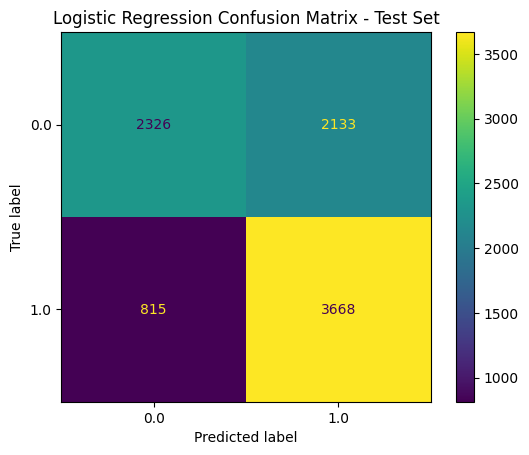

In [82]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
log_cm_reg = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
### YOUR CODE HERE ###
log_disp_reg = ConfusionMatrixDisplay(confusion_matrix=log_cm_reg, display_labels=log_clf.classes_)

# Plot confusion matrix
### YOUR CODE HERE ###
log_disp_reg.plot()

# Display plot
### YOUR CODE HERE ###
plt.title('Logistic Regression Confusion Matrix - Test Set')
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [83]:
# Create a classification report
### YOUR CODE HERE ###
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.52      0.61      4459
not verified       0.63      0.82      0.71      4483

    accuracy                           0.67      8942
   macro avg       0.69      0.67      0.66      8942
weighted avg       0.69      0.67      0.66      8942



### Interpret Regression Model Coefficients

In [84]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
### YOUR CODE HERE ###
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,-2.454196e-03
1,video_view_count,-1.690365e-07
2,video_share_count,4.825919e-06
3,video_download_count,-8.108600e-05
4,video_comment_count,4.483293e-04
5,claim_status_opinion,1.702486e+00
6,author_ban_status_banned,-4.483992e-01
7,author_ban_status_under review,-9.867372e-02


### Summary

Some of my important takeaways from this section are:
- The dataset has a few strongly correlated variables, which could lead to multicollinearity issues during logistic regression model fitting. I decided to drop video_like_count.
- Based on the logistic regression model, each additional second of the video is associated with 0.002 decrease in the log-odds of the user having a verified status.
- The predictive power of the logistic regression model was not very great, but still acceptable. A precision of 63% is less than ideal, but a recall of 82% is very good. Overall accuracy is towards the lower end of what would typically be considered acceptable. 

I developed a logistic regression model for verified status based on video features. The model had decent predictive power. Based on the estimated model coefficients from the logistic regression, longer videos tend to be associated with higher odds of the user being verified. Other video features have small estimated coefficients in the model, so their association with verified status appears small.

## Classifying Videos Using Machine Learning

Here I will create the final machine learning model for the claims classification data. I will be responsible for leading these final tasks, which include feature engineering, model development, and evaluation.

TikTok users can report videos that they believe violate the platform's terms of service. Because there are millions of TikTok videos created and viewed every day, many videos get reported, and are too many to be individually reviewed by a human moderator.

Analysis indicates that when authors violate the terms of service, they are much more likely to present a claim than an opinion. It is therefore useful to be able to determine which videos make claims and which videos are opinions.

TikTok wants to build a machine learning model to help identify claims and opinions. Videos labeled opinions will be less likely to go on to be reviewed by a human moderator. Videos labeled as claims will be further sorted by a downstream process to determine whether they should get prioritised for review. For example, videos that are classified as claims could then be ranked by how many times they were reported, then the top x% would be reviewed by a human each day.

A machine learning model would greatly assist in the effort to present human moderators with videos that are most likely to be in violation of TikTok's terms of service.

The data dictionary shows that there is a column called claim_status, which is a binary value that indicates whether a video is a claim or an opinion. This will be the target variable. For each video, the model should predict whether the video is a claim or an opinion.

This is a classification task because the model is predicting a binary class.

To determine which evaluation metric might be best, we can consider how the model might be wrong. There are two possibilities for bad predictions:

- **False positives**: When the model predicts a video is a claim when in fact it is an opinion
- **False negatives**: When the model predicts a video is an opinion when in fact it is a claim

In the given scenario, it is better for the model to predict false positives when it makes a mistake, and worse for it to predict false negatives. It is crucial to identify videos that violate the terms of service, even if it means some opinion videos are misclassified as claims. The worst case for an opinion misclassified as a claim is that the video goes to human review. The worst case for a claim that is misclassified as an opinion is that the video does not get reviewed and violates the terms of service. A video that violates the terms of service would be considered posted from a "banned" author, as referenced in the data dictionary.

Because it is more important to minimize false negatives, the model evaluation metric will be **recall**.

### Modeling Workflow and Model Selection Process

Previous work with this data has revealed that there are ~20,000 videos in the sample. This is sufficient to conduct a rigorous model validation workflow, broken into the following steps:

1. Split the data into train/validation/test sets (60/20/20)
2. Fit models and tune hyperparameters on the training set
3. Perform final model selection on the validation set
4. Assess the champion model's performance on the test set

![](https://raw.githubusercontent.com/adacert/tiktok/main/optimal_model_flow_numbered.svg)

### Feature Engineering

Extract the length of each `video_transcription_text` and add this as a column to the dataframe, so that it can be used as a potential feature in the model.

In [85]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
### YOUR CODE HERE ###
data = data.with_columns(
	pl.col('video_transcription_text').str.len_chars().alias('text_length')
)
data.head()

#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,text_length
i64,str,i64,i64,str,str,str,i64,f64,i64,i64,f64,f64,f64,f64,u32
1,"""claim""",7017666017,59,"""someone shared with me that dr…","""not verified""","""under review""",343296,19425.0,241,1,0.0,0.056584,0.0,0.000702,97
2,"""claim""",4014381136,32,"""someone shared with me that th…","""not verified""","""active""",140877,77355.0,19034,1161,684.0,0.549096,0.004855,0.135111,107
3,"""claim""",9859838091,31,"""someone shared with me that am…","""not verified""","""active""",902185,97690.0,2858,833,329.0,0.108282,0.000365,0.003168,137
4,"""claim""",1866847991,25,"""someone shared with me that th…","""not verified""","""active""",437506,239954.0,34812,1234,584.0,0.548459,0.001335,0.079569,131
5,"""claim""",7105231098,19,"""someone shared with me that th…","""not verified""","""active""",56167,34987.0,4110,547,152.0,0.62291,0.002706,0.073175,128


Calculate the average `text_length` for claims and opinions.

In [86]:
# Calculate the average text_length for claims and opinions
### YOUR CODE HERE ###
data.group_by("claim_status").agg(
	pl.col("text_length").mean().alias("avg_text_length")
)

claim_status,avg_text_length
str,f64
"""opinion""",82.722562
"""claim""",95.376978


Visualise the distribution of `text_length` for claims and opinions.

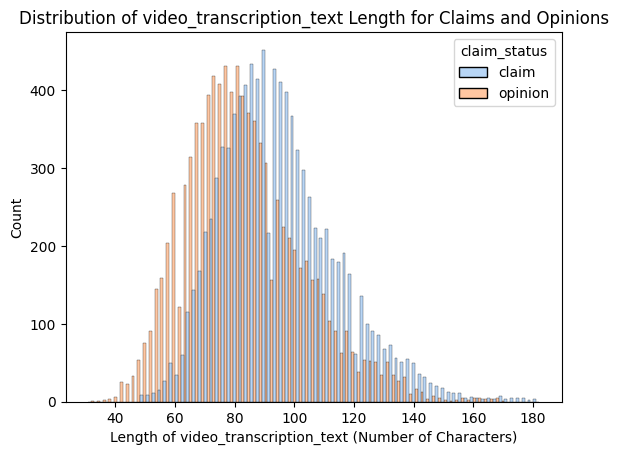

In [87]:
# Visualise the distribution of `text_length` for claims and opinions
# Create two histograms in one plot
### YOUR CODE HERE ###
sns.histplot(data=data, stat="count", multiple="dodge", x="text_length",
             kde=False, palette="pastel", hue="claim_status",
             element="bars", legend=True)
plt.xlabel("Length of video_transcription_text (Number of Characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text Length for Claims and Opinions")
plt.show()

#### Feature Selection and Transformation

Encode target and catgorical variables.

In [88]:
# Convert Polars DataFrame to pandas and create a copy
X = data.to_pandas().copy()

# Drop unnecessary columns
X = X.drop(['#', 'video_id', 'video_transcription_text', 'likes_per_view', 'comments_per_view', 'shares_per_view'], axis=1)

# Encode target variable
X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1}).infer_objects(copy=False)

# Dummy encode remaining categorical values
X = pd.get_dummies(X, columns=['verified_status', 'author_ban_status'], drop_first=True)
X.head()

C:\Users\danie\AppData\Local\Temp\ipykernel_29528\303024187.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['claim_status'] = X['claim_status'].replace({'opinion': 0, 'claim': 1}).infer_objects(copy=False)


,claim_status,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,343296,19425.0,241,1,0.0,97,False,False,True
1,1,32,140877,77355.0,19034,1161,684.0,107,False,False,False
2,1,31,902185,97690.0,2858,833,329.0,137,False,False,False
3,1,25,437506,239954.0,34812,1234,584.0,131,False,False,False
4,1,19,56167,34987.0,4110,547,152.0,128,False,False,False


### Splitting the Data

Assign target variable.

In [89]:
# Isolate target variable
### YOUR CODE HERE ###
y = X['claim_status']

Isolate the features.

In [90]:
# Isolate features
### YOUR CODE HERE ###
X = X.drop(['claim_status'], axis=1)

# Display first few rows of features dataframe
### YOUR CODE HERE ###
X.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,343296,19425.0,241,1,0.0,97,False,False,True
1,32,140877,77355.0,19034,1161,684.0,107,False,False,False
2,31,902185,97690.0,2858,833,329.0,137,False,False,False
3,25,437506,239954.0,34812,1234,584.0,131,False,False,False
4,19,56167,34987.0,4110,547,152.0,128,False,False,False


### Create Train/Validation/Test Sets

Split data into training and testing sets, 80/20.

In [91]:
# Split the data into training and testing sets
### YOUR CODE HERE ###
X_tr, X_test, y_tr, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Split the training set into training and validation sets, 75/25, to result in a final ratio of 60/20/20 for train/validation/test sets.

In [92]:
# Split the training data into training and validation sets
### YOUR CODE HERE ###
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, test_size=0.25, random_state=0)

Confirm that the dimensions of the training, validation, and testing sets are in alignment.

In [93]:
# Get shape of each training, validation, and testing set
### YOUR CODE HERE ###
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape

((11450, 10), (3817, 10), (3817, 10), (11450,), (3817,), (3817,))

### Build Models

#### Build a Random Forest Model

Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [94]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }

# Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [95]:
%%time
### Fit the model to the data 
### YOUR CODE HERE ###
rf_cv.fit(X_train, y_train)

CPU times: total: 4min 14s
Wall time: 4min 17s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [96]:
# Examine best recall score
### YOUR CODE HERE ###
rf_cv.best_score_

np.float64(0.9908534395531852)

In [97]:
# Examine best parameters
### YOUR CODE HERE ###
rf_cv.best_params_

{'max_depth': 5,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 75}

Check the precision score to make sure the model is not labeling everything as claims. You can do this by using the `cv_results_` attribute of the fit `GridSearchCV` object, which returns a numpy array that can be converted to a pandas dataframe. Then, examine the `mean_test_precision` column of this dataframe at the index containing the results from the best model. This index can be accessed by using the `best_index_` attribute of the fit `GridSearchCV` object.

In [98]:
# Access the GridSearch results and convert it to a pandas df
rf_results_df = pd.DataFrame(rf_cv.cv_results_)

# Examine the GridSearch results df at column `mean_test_precision` in the best index
rf_results_df['mean_test_precision'][rf_cv.best_index_]

np.float64(0.9994785483051682)

**Question:** How well is your model performing? Consider average recall score and precision score.

This model performs exceptionally well, with an average recall score of 0.995 across the five cross-validation folds. After checking the precision score to be sure the model is not classifying all samples as claims, it is clear that this model is making almost perfect classifications.

### Build an XGBoost Model

In [99]:
# Instantiate the XGBoost classifier
xgb = XGBClassifier(objective='binary:logistic', random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [4,8,12],
             'min_child_weight': [3, 5],
             'learning_rate': [0.01, 0.1],
             'n_estimators': [300, 500]
             }

# Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring=scoring, cv=5, refit='recall')

In [100]:
%%time
# Fit the model to the data
### YOUR CODE HERE ###
xgb_cv.fit(X_train, y_train)

CPU times: total: 11min 28s
Wall time: 51.6 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [4, 8, 12],
                         'min_child_weight': [3, 5],
                         'n_estimators': [300, 500]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [101]:
# Examine best recall score
### YOUR CODE HERE ###
xgb_cv.best_score_

np.float64(0.9898176171763818)

In [102]:
# Examine best parameters
### YOUR CODE HERE ###
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 3,
 'n_estimators': 300}

Repeat the steps used for random forest to examine the precision score of the best model identified in the grid search.

In [103]:
# Access the GridSearch results and convert it to a pandas df
xgb_results_df = pd.DataFrame(xgb_cv.cv_results_)

# Examine the GridSearch results df at column `mean_test_precision` in the best index
xgb_results_df['mean_test_precision'][xgb_cv.best_index_]

np.float64(0.9984323484093439)

**Question:** How well does your model perform? Consider recall score and precision score.

This model also performs exceptionally well, although both its precision and recall scores are slightly lower than the random forest model's.

### Evaluate Models

Evaluate models against validation data.

#### Random Forest Model

In [104]:
# Use the random forest "best estimator" model to get predictions on the validation set
y_pred = rf_cv.best_estimator_.predict(X_val)

Display the predictions on the validation set.

In [105]:
# Display the predictions on the validation set
### YOUR CODE HERE ###
y_pred

array([1, 0, 1, ..., 1, 1, 1], shape=(3817,))

Display the true labels of the validation set.

In [106]:
# Display the true labels of the validation set
### YOUR CODE HERE ###
y_val

5846     1
12058    0
2975     1
8432     1
6863     1
        ..
6036     1
6544     1
2781     1
6426     1
4450     1
Name: claim_status, Length: 3817, dtype: int64

Create a confusion matrix to visualise the results of the classification model.

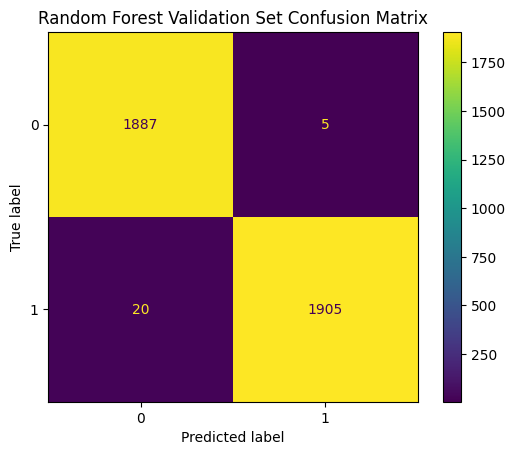

In [107]:
# Create a confusion matrix to visualise the results of the classification model

# Compute values for confusion matrix
### YOUR CODE HERE ###
log_cm_rf = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix using ConfusionMatrixDisplay()
### YOUR CODE HERE ###
log_disp_rf = ConfusionMatrixDisplay(confusion_matrix=log_cm_rf, display_labels=None)

# Plot confusion matrix
### YOUR CODE HERE ###
log_disp_rf.plot()

# Display plot
### YOUR CODE HERE ###
plt.title('Random Forest Validation Set Confusion Matrix')
plt.show()

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the model.

**Note:** In other labs there was a custom-written function to extract the accuracy, precision, recall, and F<sub>1</sub> scores from the GridSearchCV report and display them in a table. You can also use scikit-learn's built-in [`classification_report()`](https://scikit-learn.org/stable/modules/model_evaluation.html#classification-report) function to obtain a similar table of results.

In [108]:
# Create a classification report
# Create classification report for random forest model
### YOUR CODE HERE ###
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Question:** What does your classification report show? What does the confusion matrix indicate?

The four quadrants of the confusion matrix are as follows:

- True Negatives (Upper-Left Quadrant): The number of opinions that the model accurately classified as so.
- False Positives (Upper-Right Quadrant): The number of opinions that the model misclassified as claims.
- False Negatives (Lower-Left Quadrant): The number of claims that the model misclassified as opinions.
- True Positives (Lower-Right Quadrant): The number of claims that the model accurately classified as so.

The classification report above shows that the random forest model scores were essentially perfect. However, the confusion matrix shows that the random forest model is not quite perfect. A perfect model would yield all true negatives and true positives, and no false negatives or false positives. As the confusion matrix shows, this model produces five false negatives and 20 false positives.

#### XGBoost Model

Now, evaluate the XGBoost model on the validation set.

In [109]:
# Use the best estimator to predict on the validation data
### YOUR CODE HERE ###
y_pred = xgb_cv.best_estimator_.predict(X_val)
y_pred

array([1, 0, 1, ..., 1, 1, 1], shape=(3817,))

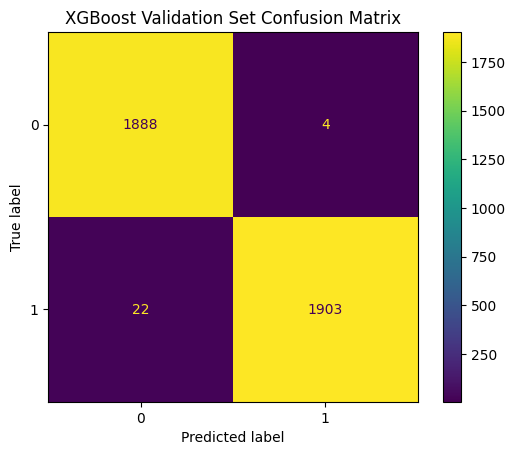

In [110]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
log_cm_xgb = confusion_matrix(y_val, y_pred)

# Create display of confusion matrix using ConfusionMatrixDisplay()
### YOUR CODE HERE ###
log_disp_xgb = ConfusionMatrixDisplay(confusion_matrix=log_cm_xgb, display_labels=None)

# Plot confusion matrix
### YOUR CODE HERE ###
log_disp_xgb.plot()

# Display plot
### YOUR CODE HERE ###
plt.title('XGBoost Validation Set Confusion Matrix')
plt.show()

In [111]:
# Create a classification report
### YOUR CODE HERE ###
target_labels = ['opinion', 'claim']
print(classification_report(y_val, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       0.99      1.00      0.99      1892
       claim       1.00      0.99      0.99      1925

    accuracy                           0.99      3817
   macro avg       0.99      0.99      0.99      3817
weighted avg       0.99      0.99      0.99      3817



**Question:** Describe your XGBoost model results. How does your XGBoost model compare to your random forest model?

The results of the XGBoost model were also nearly perfect. However, its errors tended to be false negatives. Identifying claims was the priority, therefore it is important that the model be good at capturing all actual claim videos. The random forest model has better scores, and is therefore the champion model.

### Use Champion Model to Predict on Test Data

In [112]:
### YOUR CODE HERE ###
y_pred = rf_cv.best_estimator_.predict(X_test)

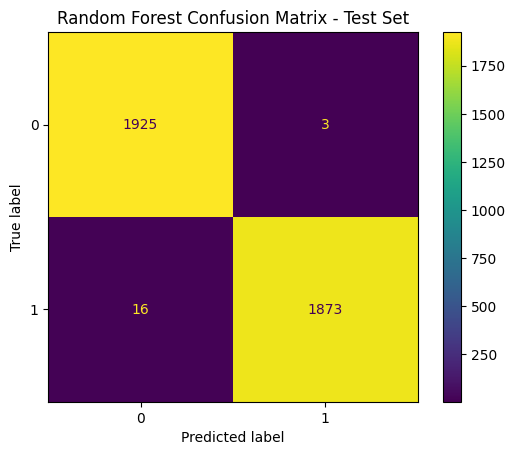

In [113]:
# Compute values for confusion matrix
### YOUR CODE HERE ###
log_cm = confusion_matrix(y_test, y_pred)

# Create display of confusion matrix using ConfusionMatrixDisplay()
### YOUR CODE HERE ###
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
### YOUR CODE HERE ###
log_disp.plot()

# Display plot
### YOUR CODE HERE ###
plt.title('Random Forest Confusion Matrix - Test Set')
plt.show()

#### Feature Importances of Champion Model

Text(0, 0.5, 'Feature')

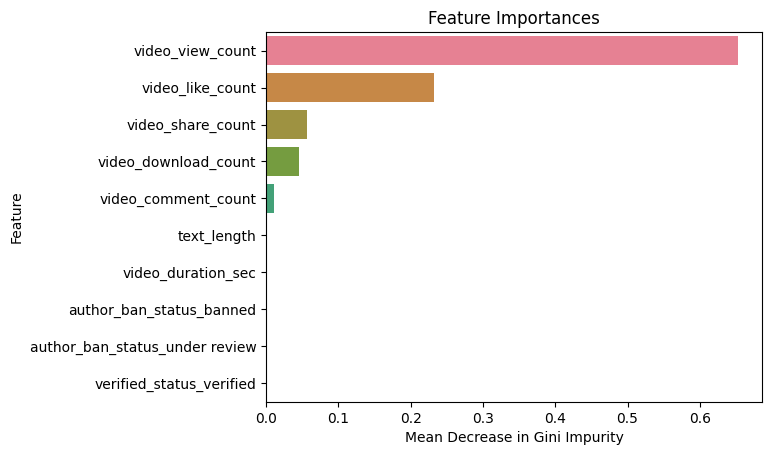

In [114]:
### YOUR CODE HERE ###
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X_test.columns).sort_values(ascending=False)

sns.barplot(y=rf_importances.index, x=rf_importances.values, hue = rf_importances.index, palette='husl')
plt.title('Feature Importances')
plt.xlabel('Mean Decrease in Gini Impurity') # This is a metric used by Random Forest to determine feature importance.
plt.ylabel('Feature')

**Question:** Describe your most predictive features. Were your results surprising?

The most predictive features all were related to engagement levels generated by the video. This is not unexpected, as analysis from prior EDA pointed to this conclusion.

### Conclusion

In this step use the results of the models above to formulate a conclusion. Consider the following questions:

1. **Would you recommend using this model? Why or why not?**

2. **What was your model doing? Can you explain how it was making predictions?**

3. **Are there new features that you can engineer that might improve model performance?**

4. **What features would you want to have that would likely improve the performance of your model?**

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.

1. I can recommend this model because it performed well on both validation and test holdout data. Both precision and F<sub>1</sub> scores were also consistently high. The model very successfully classified claims and opinions.

2. The model's most predictive features were all related to the user engagement levels associated with each video. It was classifying videos based on how many views, likes, shares, and downloads they received.

3. Because the model currently performs nearly perfectly, there is no need to engineer any new features.

4. The current version of the model does not need any new features. However, it would be helpful to have the number of times the video was reported. It would also be useful to have the total number of user reports for all videos posted by each author.

As noted, the model performed exceptionally well on the test holdout data. Before deploying the model, the data team recommends further evaluation using additional subsets of user data. Furthermore, the data team recommends monitoring the distributions of video engagement levels to ensure that the model remains robust to fluctuations in its most predictive features.
